<a href="https://colab.research.google.com/github/fatihakgumus/python_projects/blob/master/project1_police_weather_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
ri = pd.read_csv("RI_cleaned.csv")

C:\Program Files\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [ ]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [ ]:
ri.isnull().sum()/ri.isnull().shape[0]*100

id                         0.000000
state                      0.000000
stop_date                  0.001962
stop_time                  0.001962
location_raw               0.000000
county_name              100.000000
county_fips              100.000000
fine_grained_location    100.000000
police_department          0.001962
driver_gender              5.708865
driver_age_raw             5.699447
driver_age                 6.022394
driver_race_raw            5.704156
driver_race                5.704156
violation_raw              5.704156
violation                  5.704156
search_conducted           0.001962
search_type_raw           96.515075
search_type               96.515075
contraband_found           0.000000
stop_outcome               5.704156
is_arrested                5.704156
stop_duration              5.704156
out_of_state               5.862687
drugs_related_stop         0.000000
district                   0.000000
dtype: float64

In [ ]:
ri.shape

(509681, 26)

In [ ]:
drop_columns = ["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis = "columns", inplace = True)

In [ ]:
ri.shape

(509681, 22)

In [ ]:
ri.isnull().sum()

id                         0
stop_date                 10
stop_time                 10
location_raw               0
police_department         10
driver_gender          29097
driver_age_raw         29049
driver_age             30695
driver_race_raw        29073
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type_raw       491919
search_type           491919
contraband_found           0
stop_outcome           29073
is_arrested            29073
stop_duration          29073
out_of_state           29881
drugs_related_stop         0
district                   0
dtype: int64

In [ ]:
ri.dropna(subset = ["driver_gender"], inplace = True)

In [ ]:
ri.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [ ]:
ri.shape

(480584, 22)

In [ ]:
ri.dtypes

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted       object
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

In [ ]:
ri.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [ ]:
ri.is_arrested.value_counts(dropna = False)

False    463981
True      16603
Name: is_arrested, dtype: int64

In [ ]:
print(ri.is_arrested.dtype)

object


In [ ]:
ri["is_arrested"] = ri.is_arrested.astype("bool")

In [ ]:
print(ri.is_arrested.dtype)

bool


In [ ]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

In [ ]:
type(ri.stop_date)

pandas.core.series.Series

In [ ]:
type(ri.stop_date)

pandas.core.series.Series

In [ ]:
comb =  ri.stop_date + " " + ri.stop_time

In [ ]:
comb.head()

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
dtype: object

In [ ]:
combined.head()

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object

In [ ]:
ri["stop_datetime"] = pd.to_datetime(combined)

In [ ]:
ri.drop(["stop_date", "stop_time"], axis = 1, inplace = True)

In [ ]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [ ]:
print(ri.dtypes)

id                            object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [ ]:
ri.set_index("stop_datetime", inplace = True)

In [ ]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [ ]:
ri.violation.value_counts(dropna = False)

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [ ]:
ri.violation.value_counts(normalize = True)

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

In [ ]:
ri["driver_gender"].value_counts(dropna = False)

M    349446
F    131138
Name: driver_gender, dtype: int64

In [ ]:
female = ri[ri.driver_gender == "F"]

male = ri[ri.driver_gender == "M"]

In [ ]:
female.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30:00,RI-2005-00037,Zone X4,500,F,1964.0,41.0,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4


In [ ]:
male.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [ ]:
female.violation.value_counts(normalize = True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [ ]:
male.violation.value_counts(normalize = True)

Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64

In [ ]:
ri.groupby(["driver_gender"])["violation"].value_counts(normalize = True, dropna = False)

driver_gender  violation          
F              Speeding               0.657308
               Moving violation       0.136581
               Equipment              0.107055
               Registration/plates    0.043077
               Other                  0.028908
               Seat belt              0.027071
M              Speeding               0.522364
               Moving violation       0.206948
               Equipment              0.135102
               Other                  0.058450
               Registration/plates    0.040581
               Seat belt              0.036555
Name: violation, dtype: float64

In [ ]:
female_and_speeding = ri[(ri.driver_gender == "F") & (ri.violation == "Speeding")]

male_and_speeding = ri[(ri.driver_gender == "M") & (ri.violation == "Speeding")]

In [ ]:
female_and_speeding.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-07-06 11:22:00,RI-2005-00038,Zone X1,0,F,1973.0,32.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X1


In [ ]:
ri.stop_outcome.value_counts(dropna = False)

Citation            428378
Warning              28840
Arrest Driver        14630
N/D                   3431
No Action             3332
Arrest Passenger      1973
Name: stop_outcome, dtype: int64

In [ ]:
print(female_and_speeding.stop_outcome.value_counts(normalize = True))
print("--------------------")
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
--------------------
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


In [ ]:
ri.groupby(["violation", "driver_gender"])["stop_outcome"].value_counts(normalize = True)

violation  driver_gender  stop_outcome    
Equipment  F              Citation            0.727830
                          Warning             0.157490
                          N/D                 0.047938
                          Arrest Driver       0.040387
                          Arrest Passenger    0.021227
                                                ...   
Speeding   M              Warning             0.036086
                          Arrest Driver       0.015767
                          Arrest Passenger    0.001265
                          N/D                 0.001183
                          No Action           0.001063
Name: stop_outcome, Length: 71, dtype: float64

In [ ]:
print(ri.search_conducted.dtype)

object


In [ ]:
ri.search_conducted.value_counts(normalize = True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [ ]:
ri.search_conducted.mean()

0.036959199640437465

In [ ]:
ri[ri.driver_gender == "F"].search_conducted.mean()

0.018751239152648355

In [ ]:
ri[ri.driver_gender == "M"].search_conducted.mean()

0.04379217389811301

In [ ]:
ri.search_conducted.astype("bool")

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
                       ...  
2015-12-31 22:46:00    False
2015-12-31 22:47:00    False
2015-12-31 23:08:00    False
2015-12-31 23:44:00    False
2015-12-31 23:48:00    False
Name: search_conducted, Length: 480584, dtype: bool

In [ ]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   location_raw        480584 non-null  object 
 2   police_department   480584 non-null  object 
 3   driver_gender       480584 non-null  object 
 4   driver_age_raw      480583 non-null  float64
 5   driver_age          478946 non-null  float64
 6   driver_race_raw     480584 non-null  object 
 7   driver_race         480584 non-null  object 
 8   violation_raw       480584 non-null  object 
 9   violation           480584 non-null  object 
 10  search_conducted    480584 non-null  object 
 11  search_type_raw     17762 non-null   object 
 12  search_type         17762 non-null   object 
 13  contraband_found    480584 non-null  bool   
 14  stop_outcome        480584 non-null  object 
 15  

In [ ]:
# ri.groupby("driver_gender")["search_conducted"].mean()

In [ ]:
# ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

In [ ]:
# ri.groupby(["violation", "driver_gender"]).search_conducted.mean()

In [ ]:
ri.search_type.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [ ]:
ri["frisk"] = ri.search_type.str.contains("Protective Frisk", na = False)

In [ ]:
print(ri.frisk.dtype)

bool


In [ ]:
ri.frisk.sum()

1598

In [ ]:
ri[ri.frisk]

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-10-01 16:20:00,RI-2005-00253,Zone K1,600,M,1958.0,47.0,W,White,Speeding,Speeding,...,"Reasonable Suspicion,Terry Frisk","Protective Frisk,Reasonable Suspicion",True,Citation,False,16-30 Min,False,False,Zone K1,True
2005-10-06 21:35:00,RI-2005-01027,Zone X4,500,M,1966.0,39.0,W,White,Speeding,Speeding,...,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-10-07 11:33:00,RI-2005-01121,Zone X4,900,M,1980.0,25.0,W,White,Equipment/Inspection Violation,Equipment,...,Terry Frisk,Protective Frisk,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-27 19:49:00,RI-2015-43442,Zone X3,200,M,1986.0,29.0,W,White,Speeding,Speeding,...,Terry Frisk,Protective Frisk,False,Warning,False,0-15 Min,True,False,Zone X3,True
2015-12-06 10:33:00,RI-2015-44434,Zone K3,300,M,1993.0,22.0,L,Hispanic,Speeding,Speeding,...,Terry Frisk,Protective Frisk,True,Citation,False,16-30 Min,True,True,Zone K3,True
2015-12-12 09:02:00,RI-2015-45103,Zone X4,500,M,1982.0,33.0,W,White,Other Traffic Violation,Moving violation,...,Terry Frisk,Protective Frisk,False,Citation,False,16-30 Min,True,False,Zone X4,True


In [ ]:
searched = ri[ri.search_conducted]

In [ ]:
searched

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,RI-2005-00010,Zone K1,600,M,1987.0,18.0,W,White,Speeding,Speeding,...,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,False
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-09-15 02:20:00,RI-2005-00094,Zone X4,500,M,1988.0,17.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,False
2005-09-24 02:20:00,RI-2005-00115,Zone K3,300,M,1987.0,18.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone K3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28 11:05:00,RI-2015-46706,Zone K3,300,F,1996.0,19.0,W,White,APB,Other,...,Incident to Arrest,Incident to Arrest,True,Citation,False,16-30 Min,True,True,Zone K3,False
2015-12-30 01:37:00,RI-2015-46870,Zone X4,500,M,1979.0,36.0,W,White,Registration Violation,Registration/plates,...,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,False,False,Zone X4,True
2015-12-30 08:51:00,RI-2015-46903,Zone K3,300,F,1987.0,28.0,H,Hispanic,Speeding,Speeding,...,"Probable Cause,Reasonable Suspicion","Probable Cause,Reasonable Suspicion",True,Citation,False,30+ Min,True,True,Zone K3,False


In [ ]:
searched.frisk.mean()

0.08996734601959239

In [ ]:
searched.groupby("driver_gender").frisk.mean()

driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64

In [ ]:
ri.is_arrested.mean()

0.03454755048024903

In [ ]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [ ]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [ ]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [ ]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [ ]:
ri.date_time.head()

In [ ]:
import datetime as dt

In [ ]:
#  ri.date_time.dt.hour.values

In [ ]:
# ri.date_time.dt.weekday

In [ ]:
# ri.groupby(ri.date_time.dt.hour).is_arrested.mean()

In [ ]:
import matplotlib.pyplot as plt

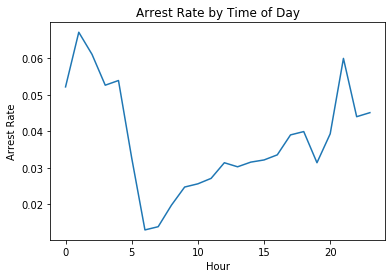

In [ ]:
hourly_arrest_rate.plot()

plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

plt.show()

In [ ]:
ri.drugs_related_stop.value_counts(dropna = False)

False    475819
True       4765
Name: drugs_related_stop, dtype: int64

In [ ]:
ri.drugs_related_stop.dtypes

dtype('bool')

In [ ]:
ri.groupby(ri.index.year).drugs_related_stop.mean()

stop_datetime
2005    0.008038
2006    0.006624
2007    0.008437
2008    0.007549
2009    0.010447
2010    0.010142
2011    0.011400
2012    0.010343
2013    0.011879
2014    0.013176
2015    0.010598
Name: drugs_related_stop, dtype: float64

In [ ]:
ri.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [ ]:
ri.drugs_related_stop.resample("Q").mean()

stop_datetime
2005-03-31    0.038462
2005-06-30    0.000000
2005-09-30    0.000000
2005-12-31    0.008054
2006-03-31    0.006718
2006-06-30    0.004827
2006-09-30    0.007578
2006-12-31    0.007396
2007-03-31    0.005633
2007-06-30    0.008159
2007-09-30    0.011103
2007-12-31    0.009431
2008-03-31    0.008689
2008-06-30    0.007828
2008-09-30    0.006388
2008-12-31    0.007391
2009-03-31    0.009120
2009-06-30    0.010512
2009-09-30    0.009478
2009-12-31    0.013257
2010-03-31    0.011422
2010-06-30    0.009872
2010-09-30    0.010294
2010-12-31    0.008719
2011-03-31    0.013235
2011-06-30    0.013576
2011-09-30    0.009950
2011-12-31    0.009483
2012-03-31    0.010989
2012-06-30    0.011053
2012-09-30    0.008115
2012-12-31    0.011127
2013-03-31    0.013310
2013-06-30    0.011984
2013-09-30    0.011308
2013-12-31    0.010915
2014-03-31    0.013768
2014-06-30    0.013892
2014-09-30    0.013819
2014-12-31    0.010830
2015-03-31    0.013201
2015-06-30    0.011628
2015-09-30    0.0104

In [ ]:
ri.drugs_related_stop.resample("M").mean()

stop_datetime
2005-01-31    0.111111
2005-02-28    0.000000
2005-03-31    0.000000
2005-04-30    0.000000
2005-05-31    0.000000
                ...   
2015-08-31    0.009389
2015-09-30    0.008172
2015-10-31    0.006429
2015-11-30    0.007361
2015-12-31    0.008844
Freq: M, Name: drugs_related_stop, Length: 132, dtype: float64

In [ ]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

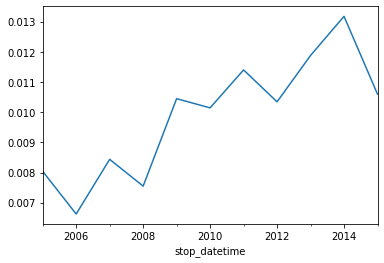

In [ ]:
annual_drug_rate.plot()

plt.show()

In [ ]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'frisk'],
      dtype='object')

In [ ]:
ri.search_conducted.head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: object

In [ ]:
ri.search_conducted.value_counts(dropna = False)

False    462822
True      17762
Name: search_conducted, dtype: int64

In [ ]:
ri.search_conducted.dtypes

dtype('O')

In [ ]:
ri["search_conducted"] = ri.search_conducted.astype("bool")

In [ ]:
ri.groupby(ri.index.year).search_conducted.mean()

stop_datetime
2005    0.050692
2006    0.037748
2007    0.041844
2008    0.039544
2009    0.049849
2010    0.042089
2011    0.037767
2012    0.032278
2013    0.029054
2014    0.030157
2015    0.027832
Name: search_conducted, dtype: float64

In [ ]:
annual_search_rate = ri.search_conducted.resample("A").mean()

In [ ]:
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [ ]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = "columns")

In [ ]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


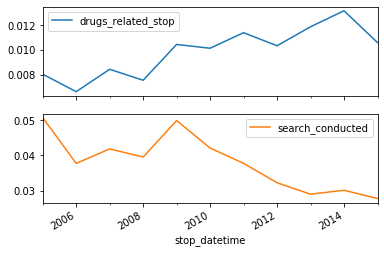

In [ ]:
annual.plot(subplots = True)

plt.show()

In [ ]:
ri.district.unique()

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [ ]:
ri.district.value_counts(dropna = False)

Zone X4    125670
Zone K3    108868
Zone K2     97281
Zone X3     89431
Zone K1     46110
Zone X1     13224
Name: district, dtype: int64

In [ ]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [ ]:
ri.violation.value_counts(dropna = False)

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [ ]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [ ]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [ ]:
all_zones.loc["Zone K1" : "Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [ ]:
k_zones = all_zones.loc["Zone K1" : "Zone K3"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
weather = pd.read_csv("weather.csv")

In [ ]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather.shape

(8022, 26)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [ ]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


C:\Program Files\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


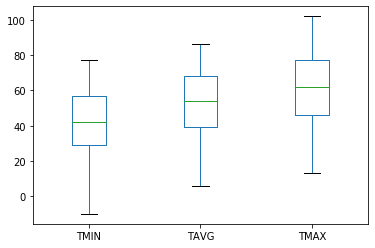

In [ ]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

plt.show()

In [ ]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

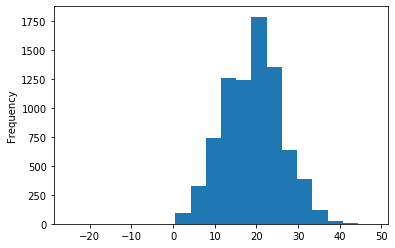

In [ ]:
weather.TDIFF.plot(kind = "hist", bins = 20)

plt.show()

In [ ]:
WT = weather.loc[:, "WT01" : "WT22"]

In [ ]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather["bad_conditions"] = WT.sum(axis = "columns")

In [ ]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [ ]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype("int")

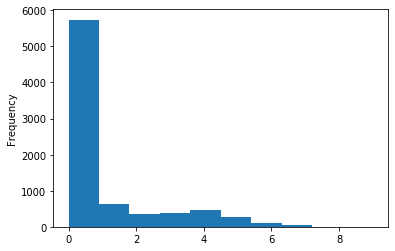

In [ ]:
weather.bad_conditions.plot(kind = "hist")

plt.show()

In [ ]:
weather.bad_conditions.value_counts(dropna = False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [ ]:
weather.bad_conditions.value_counts(dropna = False).sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [ ]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [ ]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [ ]:
weather.rating.value_counts(dropna = False)

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [ ]:
weather.rating[0]

'good'

In [ ]:
type(weather.rating[0])

str

In [ ]:
cats = ["good", "bad", "worse"]

In [ ]:
weather["rating"] = pd.Categorical(weather["rating"], ordered = True, categories = cats)

In [ ]:
weather.rating.tail()

8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [ ]:
weather.rating.min()

'good'

In [ ]:
weather.rating.max()

'worse'

In [ ]:
weather.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): [good < bad < worse]

In [ ]:
weather_rating = weather[["DATE", "rating"]]

In [ ]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [ ]:
weather_rating.shape

(8022, 2)

In [ ]:
weather_rating.DATE.nunique()

4017

In [ ]:
# ri.stop_date()

In [ ]:
weather_rating.DATE[3]

'2005-01-04'

In [ ]:
ri.shape

(480584, 21)

In [ ]:
# ri_weather = pd.merge(left = ri, right = weather_rating, left_on = "stop_date", right_on = "DATE", how = "left")

In [ ]:
# ri_weather.shape